# L05-Assignment
## Assignment Instructions

* Complete all cells as instructed, replacing any ??? with the appropriate code

* Execute Jupyter **Kernel** > **Restart & Run All** and ensure that all code blocks run without error

* Do not load any additional libraries. You must use the libraries in the Load Libraries cell provided.

* Meet all of the assignment objectives described below

* Jupyter Notebook cells can be added and inserted as desired

# Assignment objectives

Analyze storms. This includes:

* 1 point - All code blocks run without error. Jupyter **Kernel** > **Restart & Run All**
* 1 point - Create 3 ggplot charts
* 1 point - Include the following R Features at least once. You are not limited to these, only by the libraries loaded.
* 1 point - Include a written analysis of interesting patterns around the storm's category referencing the charts as evidence of your conclusions.

The above is what is required to achieve full credit for the assignment. You are welcome and encouraged to go above and beyond these requirements, just be sure these requirements are fully met first. 


## R Features
* gather() or spread()
* group_by()
* summarize()
* for() or walk() or map()
* labs()
* %>% pipe
* Map data to color
* A chart includes a categorical variable


## Datasets
* storms

In [1]:
# Load libraries
# Do not load any additional libraries other than what is provided in this template
library(lubridate)
library(tidyverse)

if(!requireNamespace("devtools")) install.packages("devtools")
devtools::install_github("dkahle/ggmap", ref = "tidyup", force=TRUE)

library('ggmap')


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()
Loading required namespace: devtools


RgoogleMaps (NA       -> 1.4.5   ) [CRAN]
png         (NA       -> 0.1-7   ) [CRAN]
plyr        (1.8.4    -> 1.8.5   ) [CRAN]
rjson       (NA       -> 0.2.20  ) [CRAN]
jpeg        (NA       -> 0.1-8.1 ) [CRAN]
digest      (0.6.20   -> 0.6.23  ) [CRAN]
scales      (1.0.0    -> 1.1.0   ) [CRAN]
bitops      (NA       -> 1.0-6   ) [CRAN]
tidyr       (0.8.3    -> 1.0.0   ) [CRAN]
Rcpp        (1.0.2    -> 1.0.3   ) [CRAN]
farver      (NA       -> 2.0.1   ) [CRAN]
R6          (2.4.0    -> 2.4.1   ) [CRAN]
lifecycle   (NA       -> 0.1.0   ) [CRAN]
pkgconfig   (2.0.2    -> 2.0.3   ) [CRAN]
BH          (1.69.0-1 -> 1.72.0-2) [CRAN]
curl        (4.0      -> 4.3     ) [CRAN]
mime        (0.7      -> 0.8     ) [CRAN]
cli         (1.1.0    -> 2.0.0   ) [CRAN]
pillar      (1.4.2    -> 1.4.3   ) [CRAN]
vctrs       (0.2.0    -> 0.2.1   ) [CRAN]
backports   (1.1.4    -> 1.1.5   ) [CRAN]


Installing 21 packages: RgoogleMaps, png, plyr, rjson, jpeg, digest, scales, bitops, tidyr, Rcpp, farver, R6, lifecycle, pkgconfig, BH, curl, mime, cli, pillar, vctrs, backports



The downloaded binary packages are in
	/var/folders/y3/cy5_b8bn08lfxxgkf0r1vxjm0000gn/T//RtmpwfQDVH/downloaded_packages
✔  checking for file ‘/private/var/folders/y3/cy5_b8bn08lfxxgkf0r1vxjm0000gn/T/RtmpwfQDVH/remotes1423f33acdd65/dkahle-ggmap-2d756e5/DESCRIPTION’
─  preparing ‘ggmap’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘ggmap/.github’
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggmap_3.0.0.tar.gz’ (389ms)
   


Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


# Data processing
Create a new data frame(s) with appropriate data types and data cleaning for the data.
- create a copy of original data
- study each attribute:
    - Name
    - Type
    - % missing values
    - Noisiness and type of noise 
    - Type of distribution
    - study correlations between attributes
    - Identify extra data that would be useful 

In [2]:
#Look at data types
storms %>% glimpse()


#make copy of original 
storms_copy <- storms

#display data frame

storms_copy%>%summary()



Observations: 10,010
Variables: 13
$ name        <chr> "Amy", "Amy", "Amy", "Amy", "Amy", "Amy", "Amy", "Amy", "…
$ year        <dbl> 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 197…
$ month       <dbl> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, …
$ day         <int> 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 3…
$ hour        <dbl> 0, 6, 12, 18, 0, 6, 12, 18, 0, 6, 12, 18, 0, 6, 12, 18, 0…
$ lat         <dbl> 27.5, 28.5, 29.5, 30.5, 31.5, 32.4, 33.3, 34.0, 34.4, 34.…
$ long        <dbl> -79.0, -79.0, -79.0, -79.0, -78.8, -78.7, -78.0, -77.0, -…
$ status      <chr> "tropical depression", "tropical depression", "tropical d…
$ category    <ord> -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ wind        <int> 25, 25, 25, 25, 25, 25, 25, 30, 35, 40, 45, 50, 50, 55, 6…
$ pressure    <int> 1013, 1013, 1013, 1013, 1012, 1012, 1011, 1006, 1004, 100…
$ ts_diameter <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ hu_diameter <db

     name                year          month             day       
 Length:10010       Min.   :1975   Min.   : 1.000   Min.   : 1.00  
 Class :character   1st Qu.:1990   1st Qu.: 8.000   1st Qu.: 8.00  
 Mode  :character   Median :1999   Median : 9.000   Median :16.00  
                    Mean   :1998   Mean   : 8.779   Mean   :15.86  
                    3rd Qu.:2006   3rd Qu.: 9.000   3rd Qu.:24.00  
                    Max.   :2015   Max.   :12.000   Max.   :31.00  
                                                                   
      hour             lat             long            status         
 Min.   : 0.000   Min.   : 7.20   Min.   :-109.30   Length:10010      
 1st Qu.: 6.000   1st Qu.:17.50   1st Qu.: -80.70   Class :character  
 Median :12.000   Median :24.40   Median : -64.50   Mode  :character  
 Mean   : 9.114   Mean   :24.76   Mean   : -64.23                     
 3rd Qu.:18.000   3rd Qu.:31.30   3rd Qu.: -48.60                     
 Max.   :23.000   Max.   :51.9

In [3]:
storms_copy%>%head()

name,year,month,day,hour,lat,long,status,category,wind,pressure,ts_diameter,hu_diameter
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<ord>,<int>,<int>,<dbl>,<dbl>
Amy,1975,6,27,0,27.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,NA,NA
Amy,1975,6,28,6,32.4,-78.7,tropical depression,-1,25,1012,NA,NA


In [4]:
#find out which columns have missing values
storms_copy %>% map(~sum(is.na(.)))

$name
[1] 0

$year
[1] 0

$month
[1] 0

$day
[1] 0

$hour
[1] 0

$lat
[1] 0

$long
[1] 0

$status
[1] 0

$category
[1] 0

$wind
[1] 0

$pressure
[1] 0

$ts_diameter
[1] 6528

$hu_diameter
[1] 6528

In [5]:

percent_missing_val <- function(data){
    
    #This function identifies columns with missing functions. 
    #Will later add to calculate percent missing from each column
    
    for (nm in names(data)){
        
        numNAs <- (sum(is.na(data[[nm]])))
        
        if (numNAs != 0 ){
            print(nm)
            print(numNAs)   # Need a dictionary like object to print missing values
            
            
        }

    }
    
}


storms_copy %>% percent_missing_val()


[1] "ts_diameter"
[1] 6528
[1] "hu_diameter"
[1] 6528


#### The only variables with missing values are ts_diameter and hu_diameter

In [6]:
colnames <- storms_copy %>% names()

In [7]:

#combine date 
storms_copy <- storms_copy %>% 
    mutate(date = make_date(year, month, day),
           status = as.factor(status), 
            category = as.factor(category),
            name = as.factor(name),
           year = as.factor(year),
           month = as.factor(month)
            )%>%
    arrange(date, hour) %>% 
    select(date,year,month, hour, name, lat, long, category, wind, pressure, ts_diameter, hu_diameter, status)


In [8]:
storms_copy%>%head()

date,year,month,hour,name,lat,long,category,wind,pressure,ts_diameter,hu_diameter,status
<date>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<ord>,<int>,<int>,<dbl>,<dbl>,<fct>
1975-06-27,1975,6,0,Amy,27.5,-79.0,-1,25,1013,NA,NA,tropical depression
1975-06-27,1975,6,6,Amy,28.5,-79.0,-1,25,1013,NA,NA,tropical depression
1975-06-27,1975,6,12,Amy,29.5,-79.0,-1,25,1013,NA,NA,tropical depression
1975-06-27,1975,6,18,Amy,30.5,-79.0,-1,25,1013,NA,NA,tropical depression
1975-06-28,1975,6,0,Amy,31.5,-78.8,-1,25,1012,NA,NA,tropical depression
1975-06-28,1975,6,6,Amy,32.4,-78.7,-1,25,1012,NA,NA,tropical depression


In [9]:
status_wind_summaries <- storms_copy %>% group_by(status) %>%
    summarize(wind_max =  wind %>% max(),
              wind_avg  = wind %>% mean(),
              wind_min  = wind %>% min())

status_wind_summaries <- status_wind_summaries %>%
    gather(2:4, key = wind_metric, value = wind_value)%>%
    mutate(wind_metric = wind_metric %>% str_replace('wind_', ""))
    
# summary statistics 
status_wind_summaries

status,wind_metric,wind_value
<fct>,<chr>,<dbl>
hurricane,max,160.00000
tropical depression,max,30.00000
tropical storm,max,70.00000
hurricane,avg,85.96894
tropical depression,avg,27.26916
tropical storm,avg,45.80590
hurricane,min,65.00000
tropical depression,min,10.00000
tropical storm,min,35.00000


# Chart 1

Plot every numberic variable against the target of "wind'

In [10]:
gg_scatter <- function(data, x_col, y_col,
                      title_param = str_c(y_col, " vs ", x_col),
                      subtitle_param = str_c("Row count:", data %>% nrow()), 
                        alpha_param = 0.5, 
                        method_param = "lm",
                      se_param = FALSE){
    
    #generate plot stored as plt
    plt <- data %>% ggplot(mapping = aes_string(x = x_col, y = y_col), color = color) + 
        geom_jitter(alpha = alpha_param)+ 
        geom_smooth(method = method_param, se = se_param)+
        ggtitle(title_param, subtitle = subtitle_param)
    
    #print plot
    plt %>% print
    
}

In [11]:
y_col = 'wind'

remove <- c('hour', 'wind', 'lat', 'long')

nums <- unlist(lapply(storms_copy, is.numeric))  

x_cols <- storms_copy[nums] %>% names()

x_cols <- x_cols[!x_cols %in% remove]


Warning message:
“Removed 6528 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 6528 rows containing missing values (geom_point).”

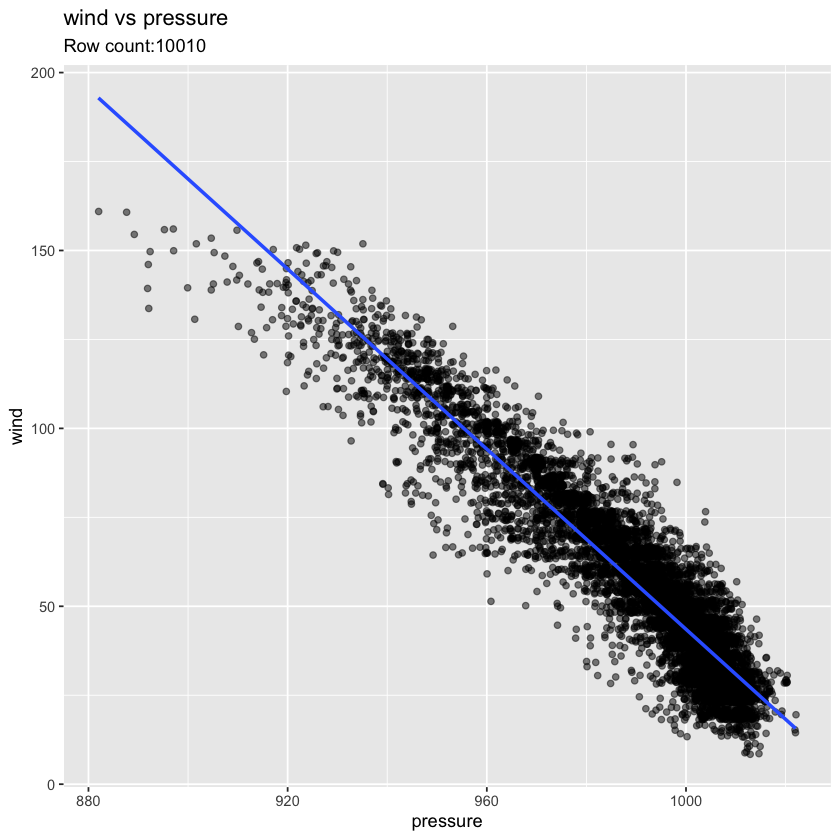

Warning message:
“Removed 6528 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 6528 rows containing missing values (geom_point).”

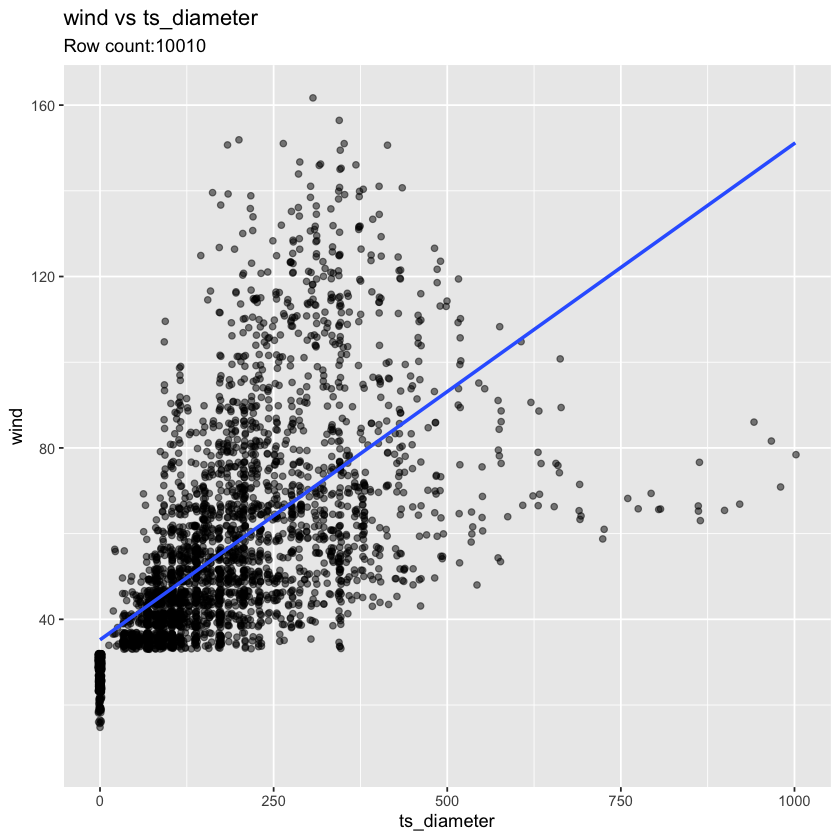

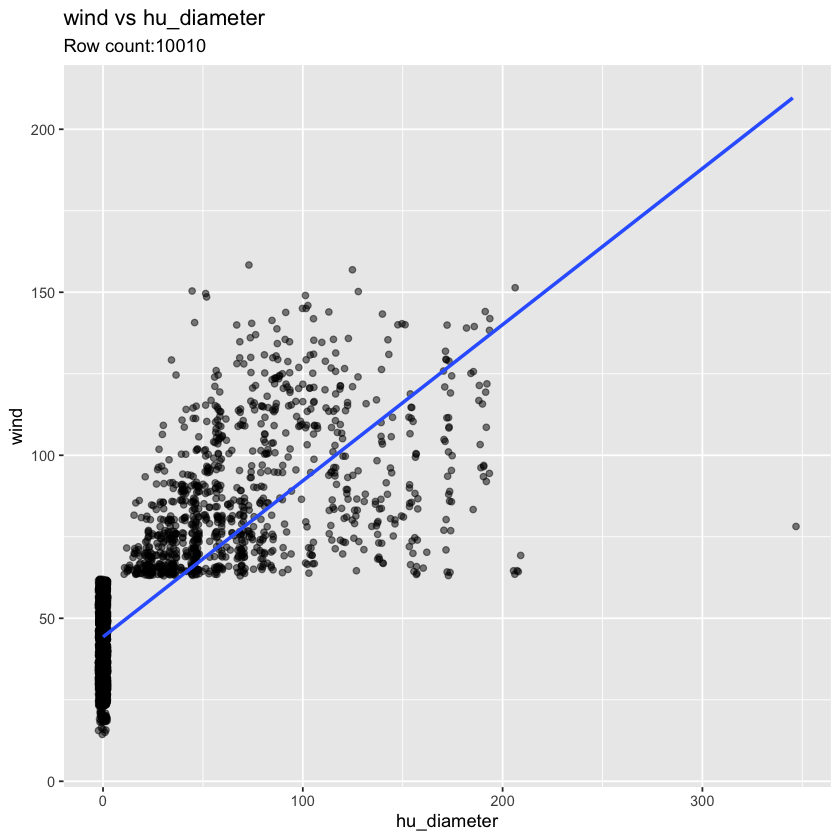

In [12]:
x_cols %>% walk(gg_scatter, data = storms_copy, y_col = y_col)

# Chart 2
compare thunder storms over time



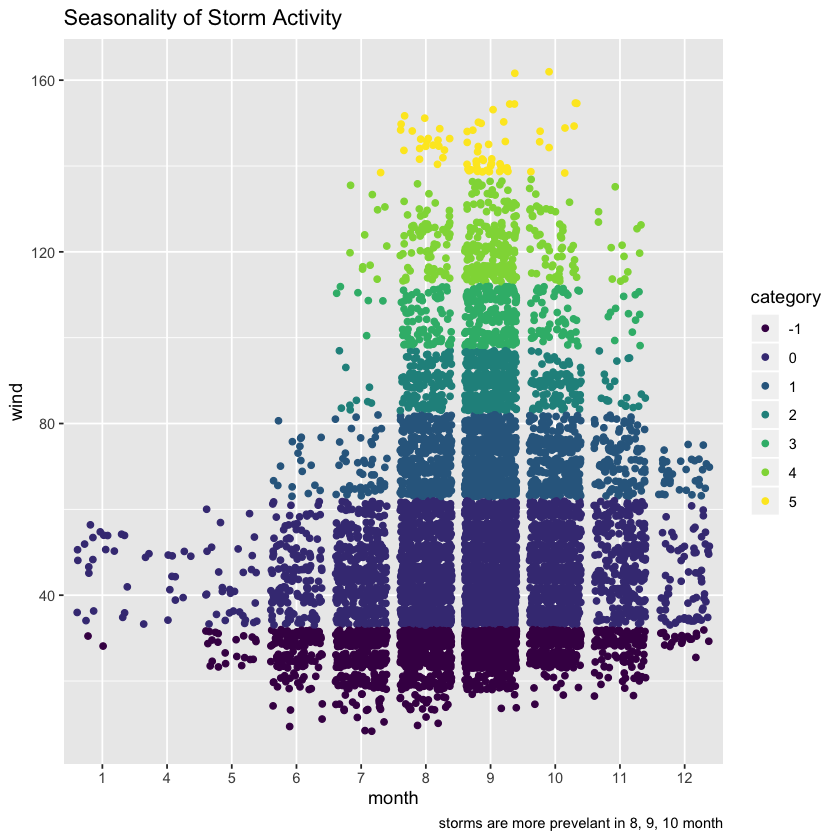

In [13]:
storms_copy %>% ggplot(aes(x = month, y = wind, color = category)) +
    geom_jitter()+
    labs(title = "Seasonality of Storm Activity",
        caption = 'storms are more prevelant in 8, 9, 10 month')

# Chart 3
Optionally double click to edit this text to describe this chart.

In [14]:
long <- mean(storms_copy$long)
lat <- mean(storms_copy$lat)

In [15]:
p <- ggmap(get_googlemap(center = c(lon = -122.335167, lat = 47.608013),
                    zoom = 11, scale = 2,
                    maptype ='terrain',
                    color = 'color'))

print(p)

#p + geom_point(aes(x = Longitude, y = Latitude)

ERROR: Error: Google now requires an API key.
       See ?register_google for details.


# Analysis and Conclusions
Double click to edit this text to document your analysis and conclusions. One paragraph is sufficient.